# Analiza finansowych szeregów czasowych
Projekt koncentruje się na analizie finansowych szeregów czasowych oraz weryfikacji rynkowego zjawiska znanego jako "Volatility Clustering" (grupowanie zmienności). Głównym celem jest zbadanie zależności między poziomem rynkowego niepokoju, reprezentowanym przez indeks VIX, a prawdopodobieństwem wystąpienia po sobie dni o wysoce ponadprzeciętnych wahaniach cen na indeksie S&P 500.

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np

uploaded = files.upload()

sp500 = pd.read_csv("SP500_data_close.csv", parse_dates=["date"], index_col="date")
sp500_series = sp500["GSPC.Close"]
print(sp500_series.head())

vix = pd.read_csv("VIX.csv", parse_dates=["date"], index_col="date")
vix_series = vix["VIX.Close"]
print(vix_series.head())

gold = pd.read_csv("gold.csv", parse_dates=["date"], index_col="date")
gold_series = gold["GC.F.Close"]
print(gold_series.head())

usdpln = pd.read_csv("usdpln_d.csv", parse_dates=["Date"], index_col="Date")
usdpln_series = usdpln["Close"]
print(usdpln_series.head())

Saving gold.csv to gold.csv
Saving usdpln_d.csv to usdpln_d.csv
Saving SP500_data_close.csv to SP500_data_close.csv
Saving VIX.csv to VIX.csv
date
1997-01-02    737.010010
1997-01-03    748.030029
1997-01-06    747.650024
1997-01-07    753.229980
1997-01-08    748.409973
Name: GSPC.Close, dtype: float64
date
1997-01-02    21.139999
1997-01-03    19.129999
1997-01-06    19.889999
1997-01-07    19.350000
1997-01-08    20.240000
Name: VIX.Close, dtype: float64
date
2000-08-30    273.899994
2000-08-31    278.299988
2000-09-01    277.000000
2000-09-04           NaN
2000-09-05    275.799988
Name: GC.F.Close, dtype: float64
Date
1984-01-02    0.0098
1984-01-09    0.0099
1984-01-16    0.0099
1984-01-23    0.0099
1984-01-30    0.0099
Name: Close, dtype: float64


In [ ]:
sp500_series = sp500_series.interpolate(method='linear')
vix_series = vix_series.interpolate(method='linear')
gold_series = gold_series.interpolate(method='linear')
usdpln_series = usdpln_series.interpolate(method='linear')

print(sp500_series.isna().sum())
print(vix_series.isna().sum())
print(gold_series.isna().sum())
print(usdpln_series.isna().sum())

0
0
0
0


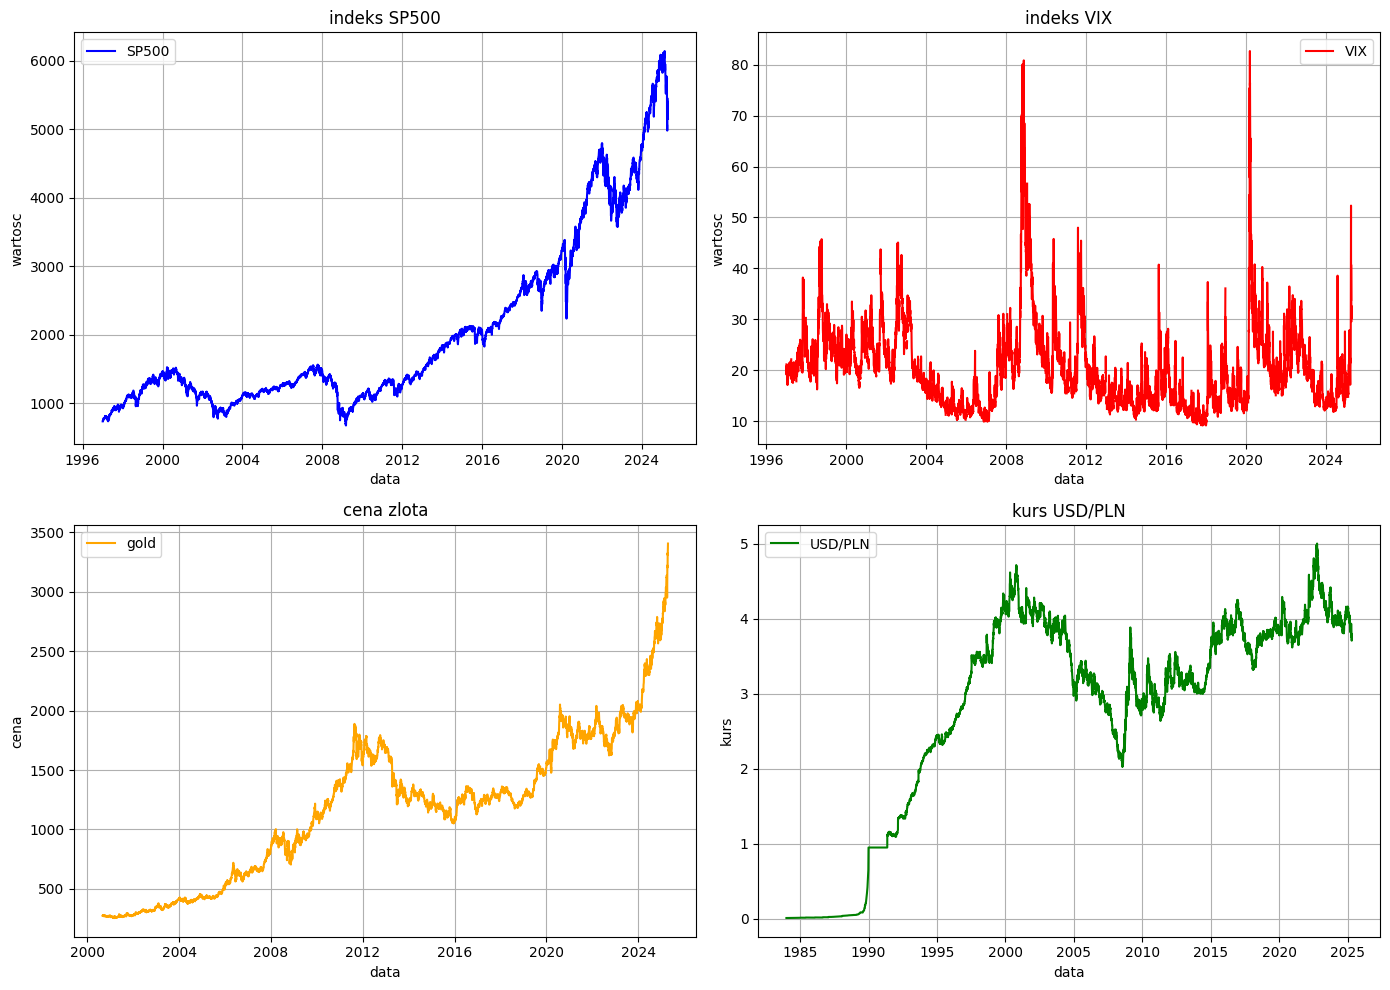

In [ ]:
import matplotlib.pyplot as plt

dane = [(sp500, "GSPC.Close", "indeks SP500", "SP500", "blue", "wartosc"),
        (vix, "VIX.Close", "indeks VIX", "VIX", "red", "wartosc"),
        (gold, "GC.F.Close", "cena zlota", "gold", "orange", "cena"),
        (usdpln, "Close", "kurs USD/PLN", "USD/PLN", "green", "kurs")]

plt.figure(figsize=(14,10))
for i, (df, kolumna, tytul, label, kolor, ylab) in enumerate(dane, 1):
  plt.subplot(2,2,i)
  plt.plot(df.index, df[kolumna], label=label, color=kolor)
  plt.title(tytul)
  plt.xlabel("data")
  plt.ylabel(ylab)
  plt.legend()
  plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame({"sp500": sp500_series,"gold": gold_series,"usdpln": usdpln_series,"vix": vix_series})

print(df.isnull().sum())
df_cl = df.dropna()
print(df_cl.isnull().sum())
print(df_cl.head())

sp500     2163
gold      3020
usdpln     109
vix       1900
dtype: int64
sp500     0
gold      0
usdpln    0
vix       0
dtype: int64
                  sp500        gold  usdpln        vix
2000-08-30  1502.589966  273.899994  4.3675  17.690001
2000-08-31  1517.680054  278.299988  4.3690  16.840000
2000-09-01  1520.770020  277.000000  4.3670  17.530001
2000-09-05  1507.079956  275.799988  4.3370  19.820000
2000-09-06  1492.250000  274.200012  4.3765  20.790001


In [ ]:
def vol(wartosc):
  if wartosc < 12:
    return "low"
  elif wartosc > 20:
    return "high"
  else:
    return "medium"

df["volatility_level"] = df["vix"].apply(vol)
df_cl = df.dropna()
print(df_cl.head())

                  sp500        gold  usdpln        vix volatility_level
2000-08-30  1502.589966  273.899994  4.3675  17.690001           medium
2000-08-31  1517.680054  278.299988  4.3690  16.840000           medium
2000-09-01  1520.770020  277.000000  4.3670  17.530001           medium
2000-09-05  1507.079956  275.799988  4.3370  19.820000           medium
2000-09-06  1492.250000  274.200012  4.3765  20.790001             high


In [ ]:
df["sp500 returns"] = np.log(df["sp500"]/df["sp500"].shift(1))
df["gold returns"] = np.log(df["gold"]/df["gold"].shift(1))
df["usdpln returns"] = np.log(df["usdpln"]/df["usdpln"].shift(1))

df_cl = df.dropna()
print(df_cl[["sp500", "sp500 returns", "gold", "gold returns", "usdpln", "usdpln returns"]].head())

                  sp500  sp500 returns        gold  gold returns  usdpln  \
2000-08-31  1517.680054       0.009993  278.299988      0.015937  4.3690   
2000-09-01  1520.770020       0.002034  277.000000     -0.004682  4.3670   
2000-09-06  1492.250000      -0.009889  274.200012     -0.005818  4.3765   
2000-09-07  1502.510010       0.006852  274.000000     -0.000730  4.4150   
2000-09-08  1494.500000      -0.005345  273.299988     -0.002558  4.4250   

            usdpln returns  
2000-08-31        0.000343  
2000-09-01       -0.000458  
2000-09-06        0.009066  
2000-09-07        0.008759  
2000-09-08        0.002262  


Odpowiednie przygotowanie danych wymagało wyrównania indeksów czasowych oraz interpolacji brakujących wartości, co zapewnia ciągłość i rzetelność analizy. Kluczowym krokiem metodycznym było przekształcenie surowych cen w logarytmiczne stopy zwrotu, które lepiej oddają dynamikę zmian i stanowią standard w inżynierii finansowej. Dodatkowo, historyczne notowania indeksu VIX posłużyły do kategoryzacji rynku na trzy odrębne reżimy zmienności: niską, średnią oraz wysoką.

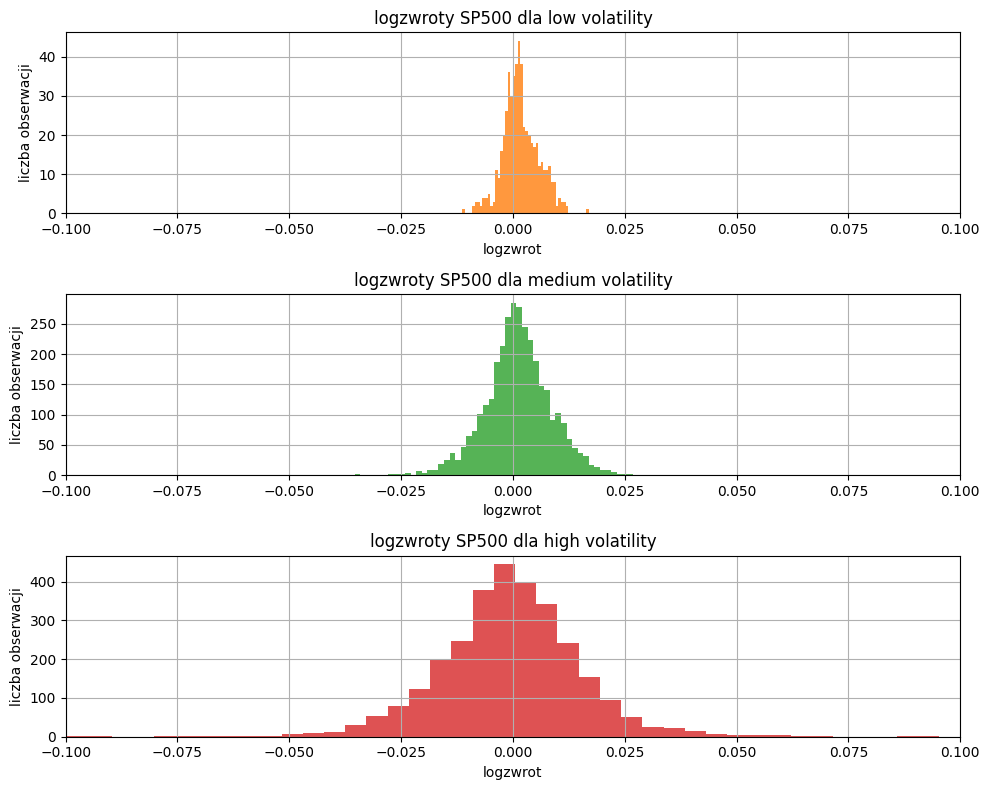

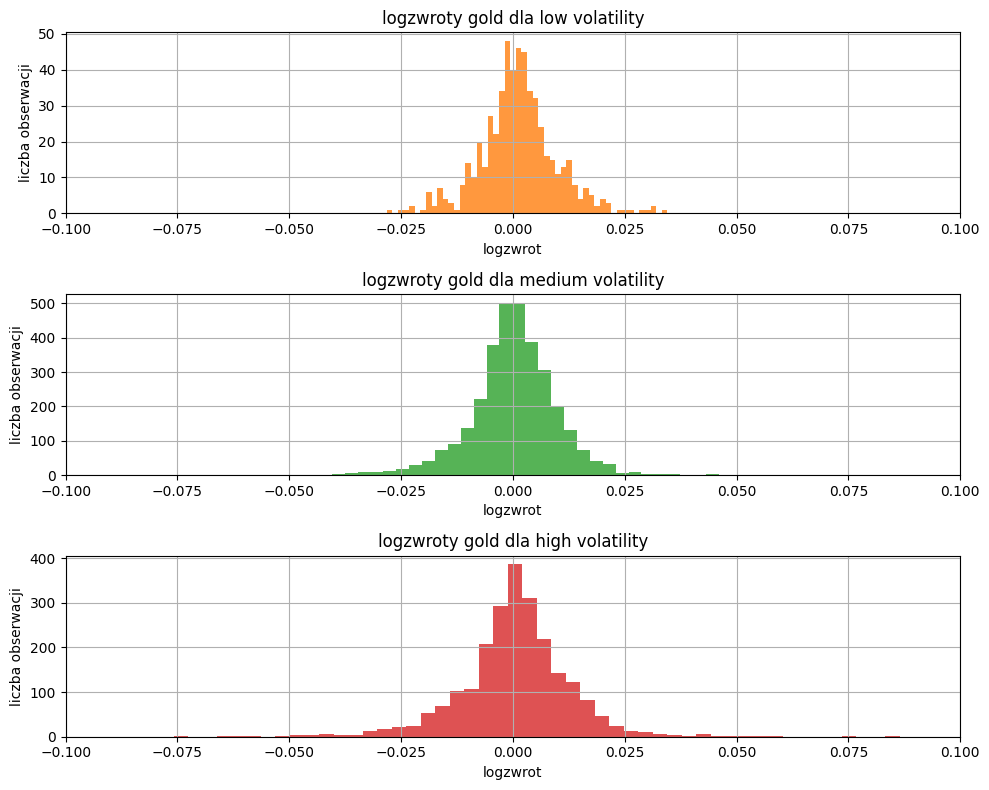

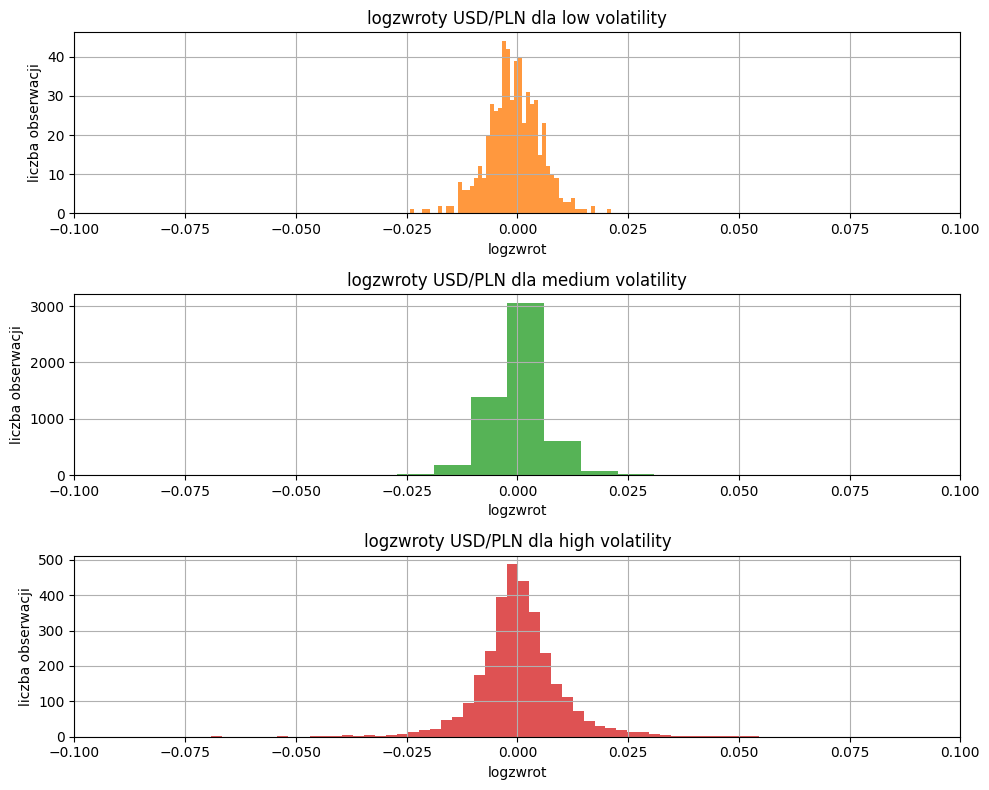

In [ ]:
aktywa = {"SP500": "sp500 returns","gold": "gold returns","USD/PLN": "usdpln returns"}

for nazwy, kol in aktywa.items():
  plt.figure(figsize=(10,8))
  for i, j in enumerate(["low", "medium", "high"], start=1):
    plt.subplot(3,1,i)
    data = df[df["volatility_level"] == j][kol].dropna()
    plt.hist(data, bins=50, alpha=0.8, color="C"+str(i))
    plt.title(f"logzwroty {nazwy} dla {j} volatility")
    plt.xlim(-0.1,0.1)
    plt.xlabel("logzwrot")
    plt.ylabel("liczba obserwacji")
    plt.grid(True)
  plt.tight_layout()
  plt.show()

Wygenerowane wizualizacje historycznych cen i stóp zwrotu pozwalają na wstępną ocenę zachowania badanych aktywów w czasie. Analiza rozkładów logarytmicznych stóp zwrotu dla różnych reżimów zmienności wyraźnie pokazuje, jak rosnący VIX spłaszcza rozkład i poszerza jego ramiona.

In [ ]:
df["sp500 returns"] = np.log(df["sp500"]/df["sp500"].shift(1))
prog = 0.02

duze_ruchy = df["sp500 returns"].abs() >= prog
kolejny_dzien_duzy = duze_ruchy.shift(-1)
oba_duze = duze_ruchy & kolejny_dzien_duzy
liczba_duzych_dni = duze_ruchy.sum()
liczba_kontynuacji = oba_duze.sum()
procent = (liczba_kontynuacji/liczba_duzych_dni) * 100 if liczba_duzych_dni > 0 else 0

print(f"liczba dni z duzym logzwrotem: {liczba_duzych_dni}")
print(f"liczba dni, po ktorych kolejny dzien tez miał duzy logzwrot: {liczba_kontynuacji}")
print(f"procentowo: {procent:.2f}%")

liczba dni z duzym logzwrotem: 544
liczba dni, po ktorych kolejny dzien tez miał duzy logzwrot: 121
procentowo: 22.24%


9. Wykonać te same obliczenia co w punkcie poprzednim oddzielnie dla okresów o niskiej, średniej i wysokiej
wolatylności.

In [ ]:
poziomy = ["low", "medium", "high"]

for poziom in poziomy:
  df_vol = df[df["volatility_level"] == poziom].copy()
  duze_ruchy = df_vol["sp500 returns"].abs() >= prog
  kolejny_dzien_duzy = duze_ruchy.shift(-1)
  oba_duze = duze_ruchy & kolejny_dzien_duzy
  liczba_duzych_dni = duze_ruchy.sum()
  liczba_kontynuacji = oba_duze.sum()
  procent = (liczba_kontynuacji/liczba_duzych_dni) * 100 if liczba_duzych_dni > 0 else 0

  print(f"volatility level: {poziom}")
  print(f"liczba dni z duzym logzwrotem: {liczba_duzych_dni}")
  print(f"liczba dni, po ktorych kolejny dzien tez miał duzy logzwrot: {liczba_kontynuacji}")
  print(f"procentowo: {procent:.2f}%")

volatility level: low
liczba dni z duzym logzwrotem: 0
liczba dni, po ktorych kolejny dzien tez miał duzy logzwrot: 0
procentowo: 0.00%
volatility level: medium
liczba dni z duzym logzwrotem: 39
liczba dni, po ktorych kolejny dzien tez miał duzy logzwrot: 1
procentowo: 2.56%
volatility level: high
liczba dni z duzym logzwrotem: 505
liczba dni, po ktorych kolejny dzien tez miał duzy logzwrot: 119
procentowo: 23.56%


Otrzymane wyniki analityczne jednoznacznie i empirycznie potwierdzają teorię grupowania zmienności. W okresach uspokojenia na rynku (niski VIX), duże wahania cenowe praktycznie nie występują w seriach. Sytuacja zmienia się drastycznie w momentach rynkowej paniki (wysoki VIX) – prawdopodobieństwo, że po dniu z potężnym odchyleniem nastąpi kolejny dzień o równie wysokiej zmienności, wzrasta do ponad 23%. Oznacza to, że rynkowe szoki nie są zjawiskami odosobnionymi, lecz mają silną tendencję do kaskadowego występowania dzień po dniu.

Przeprowadzone badanie skutecznie demonstruje praktyczne zastosowanie języka Python w obszarze finansów ilościowych. Wyniki udowodniły, że indeks VIX jest niezwykle trafnym wskaźnikiem struktury rynkowej. Potwierdzenie zjawiska Volatility Clustering pokazuje, że w okresach podwyższonej niepewności rynki zachowują się w sposób nieliniowy, a duże ruchy cenowe wywołują kolejne wstrząsy.